In [1]:
%matplotlib inline

import numpy as np

import tensorflow.data as tf_data
import tensorflow.keras as keras
import tensorflow.keras.regularizers as regularizers
import tensorflow.train as train
import tensorflow.keras.layers as layers

import matplotlib.pyplot as plt

In [2]:
def load_data(file):
    data = np.loadtxt(file, delimiter=',', skiprows=1)
    return data

def split_train_eval(data, ratio):
    rows = data.shape[0]
    rows = int(rows * ratio)
    train_data, eval_data = np.split(data, [rows,], axis=0)
    
    return train_data, eval_data

def split_x_y(data):
    x = data[:, 1:]/256
    y = data[:, :1]
    
    print(x.shape)
    print(y.shape)
    
    return x, y
    

In [3]:
def build_model_convolution_dense():
    model = keras.Sequential()
    
    model.add(layers.Reshape((28, 28, 1), input_shape=(784, )))
    model.add(layers.Conv2D(filters=25, kernel_size=5, activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(
        optimizer=train.AdamOptimizer(0.001, ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


def build_model_convolution_diluted():
    model = keras.Sequential()
    
    model.add(layers.Reshape((28, 28, 1), input_shape=(784, )))
    model.add(layers.Conv2D(filters=25, kernel_size=5, dilation_rate=1, activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(
        optimizer=train.AdamOptimizer(0.001, ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


def build_model_convolution_separable():
    model = keras.Sequential()
    
    model.add(layers.Reshape((28, 28, 1), input_shape=(784, )))
    model.add(layers.Conv2D(filters=5, kernel_size=[5, 1], activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.Conv2D(filters=5, kernel_size=[1, 5], activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(
        optimizer=train.AdamOptimizer(0.001, ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [17]:
def visualize_prediction(datum, label, predictions):
    label = int(label)
    
    image = datum.reshape(28, 28)
    
    prediction = np.argmax(predictions)
    
    plt.title("Label: {}, Prediction: {}".format(label, prediction))
    plt.imshow(image, cmap='gray')
    plt.show()

In [5]:
data = load_data('train.csv')


In [6]:
train_data, eval_data = split_train_eval(data, 0.8)

train_x, train_y = split_x_y(train_data)
eval_x, eval_y = split_x_y(eval_data)


(33600, 784)
(33600, 1)
(8400, 784)
(8400, 1)


In [7]:
model_dense = build_model_convolution_dense()
model_dense.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 25)        650       
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                144010    
Total params: 144,660
Trainable params: 144,660
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_dense.fit(x=train_x, y=train_y, batch_size=100, epochs=10, validation_data=[eval_x, eval_y], shuffle=True)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 6s 165us/sample - loss: 0.3186 - acc: 0.9084 - val_loss: 0.1546 - val_acc: 0.9569
Epoch 2/10
33600/33600 [==============================] - 6s 164us/sample - loss: 0.1123 - acc: 0.9701 - val_loss: 0.0909 - val_acc: 0.9737
Epoch 3/10
33600/33600 [==============================] - 5s 159us/sample - loss: 0.0718 - acc: 0.9798 - val_loss: 0.0821 - val_acc: 0.9739
Epoch 4/10
33600/33600 [==============================] - 5s 161us/sample - loss: 0.0526 - acc: 0.9854 - val_loss: 0.0674 - val_acc: 0.9801
Epoch 5/10
33600/33600 [==============================] - 5s 164us/sample - loss: 0.0432 - acc: 0.9879 - val_loss: 0.0678 - val_acc: 0.9794
Epoch 6/10
33600/33600 [==============================] - 6s 172us/sample - loss: 0.0334 - acc: 0.9904 - val_loss: 0.0664 - val_acc: 0.9798
Epoch 7/10
33600/33600 [==============================] - 5s 164us/sample - loss: 0.0277 - acc: 0.9923 - val_lo

In [9]:
model_diluted = build_model_convolution_diluted()
model_diluted.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 25)        650       
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                144010    
Total params: 144,660
Trainable params: 144,660
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_diluted.fit(x=train_x, y=train_y, batch_size=100, epochs=10, validation_data=[eval_x, eval_y], shuffle=True)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 6s 171us/sample - loss: 0.3080 - acc: 0.9138 - val_loss: 0.1481 - val_acc: 0.9543
Epoch 2/10
33600/33600 [==============================] - 5s 163us/sample - loss: 0.1070 - acc: 0.9693 - val_loss: 0.0893 - val_acc: 0.9732
Epoch 3/10
33600/33600 [==============================] - 5s 163us/sample - loss: 0.0726 - acc: 0.9788 - val_loss: 0.0801 - val_acc: 0.9751
Epoch 4/10
33600/33600 [==============================] - 5s 163us/sample - loss: 0.0577 - acc: 0.9833 - val_loss: 0.0729 - val_acc: 0.9781
Epoch 5/10
33600/33600 [==============================] - 5s 163us/sample - loss: 0.0444 - acc: 0.9873 - val_loss: 0.0690 - val_acc: 0.9798
Epoch 6/10
33600/33600 [==============================] - 6s 164us/sample - loss: 0.0364 - acc: 0.9892 - val_loss: 0.0627 - val_acc: 0.9813
Epoch 7/10
33600/33600 [==============================] - 6s 164us/sample - loss: 0.0297 - acc: 0.9917 - val_lo

In [11]:
model_separable = build_model_convolution_separable()
model_separable.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 28, 5)         30        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 5)         130       
_________________________________________________________________
flatten_2 (Flatten)          (None, 2880)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                28810     
Total params: 28,970
Trainable params: 28,970
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_separable.fit(x=train_x, y=train_y, batch_size=100, epochs=10, validation_data=[eval_x, eval_y], shuffle=True)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 4s 108us/sample - loss: 0.5216 - acc: 0.8550 - val_loss: 0.2752 - val_acc: 0.9202
Epoch 2/10
33600/33600 [==============================] - 4s 107us/sample - loss: 0.2313 - acc: 0.9326 - val_loss: 0.1891 - val_acc: 0.9476
Epoch 3/10
33600/33600 [==============================] - 4s 105us/sample - loss: 0.1596 - acc: 0.9543 - val_loss: 0.1383 - val_acc: 0.9605
Epoch 4/10
33600/33600 [==============================] - 3s 104us/sample - loss: 0.1205 - acc: 0.9664 - val_loss: 0.1200 - val_acc: 0.9656
Epoch 5/10
33600/33600 [==============================] - 4s 105us/sample - loss: 0.1008 - acc: 0.9707 - val_loss: 0.1083 - val_acc: 0.9675
Epoch 6/10
33600/33600 [==============================] - 4s 105us/sample - loss: 0.0839 - acc: 0.9764 - val_loss: 0.0980 - val_acc: 0.9701
Epoch 7/10
33600/33600 [==============================] - 4s 104us/sample - loss: 0.0751 - acc: 0.9781 - val_lo

In [13]:
predictions = model_dense.predict(eval_x[:50])

In [16]:
print(eval_y)

[[0.]
 [7.]
 [7.]
 ...
 [7.]
 [6.]
 [9.]]


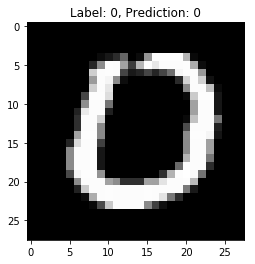

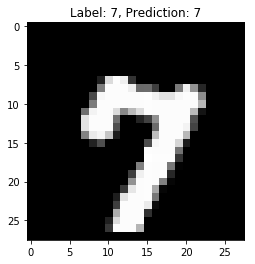

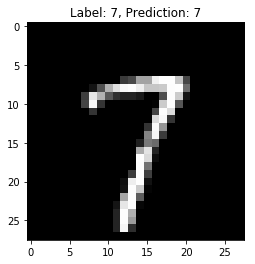

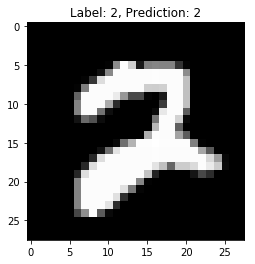

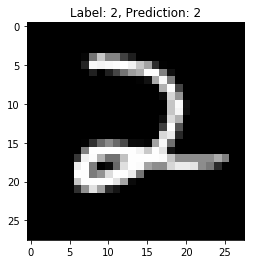

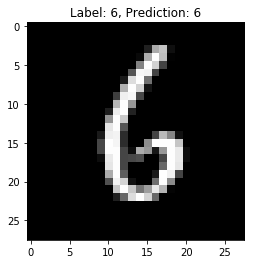

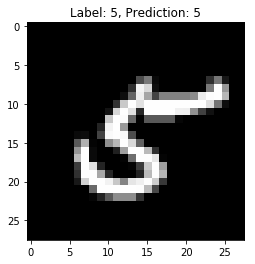

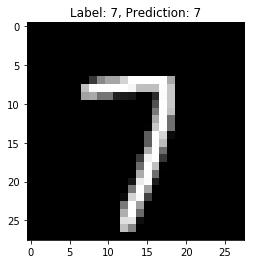

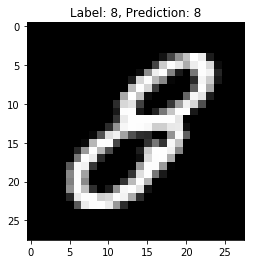

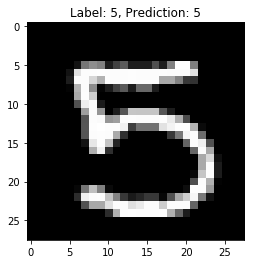

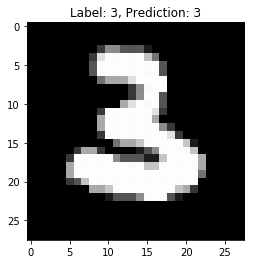

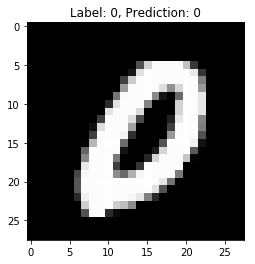

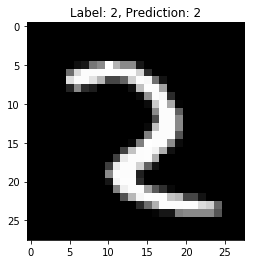

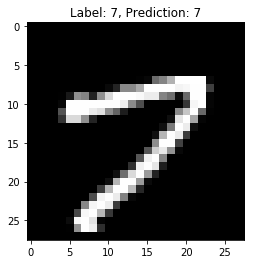

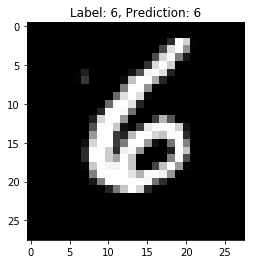

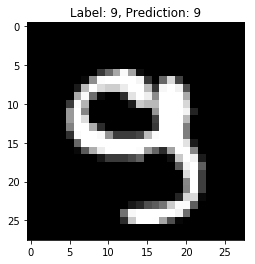

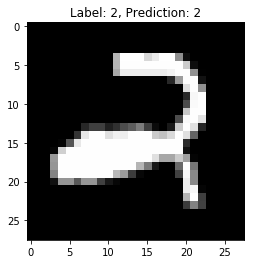

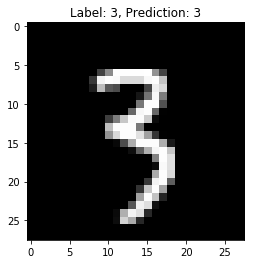

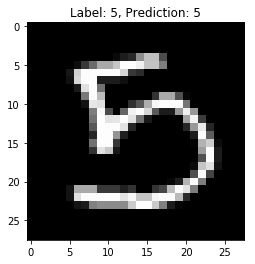

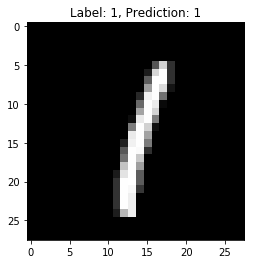

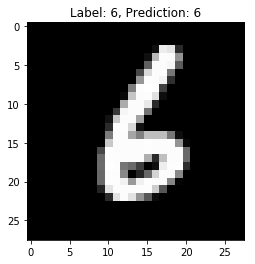

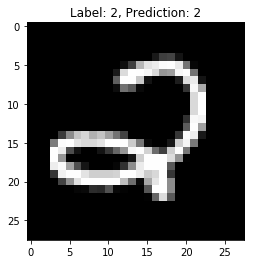

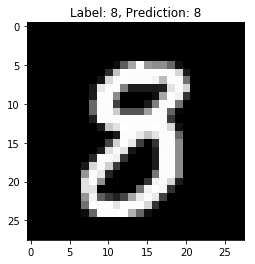

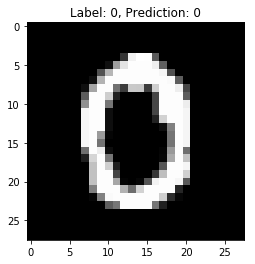

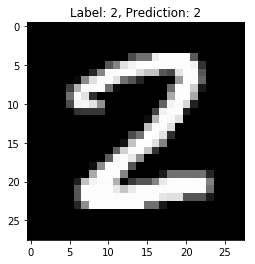

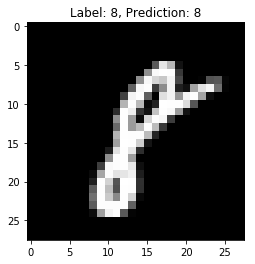

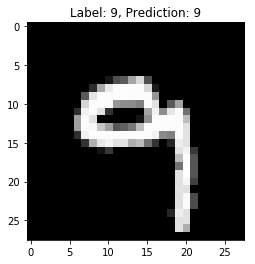

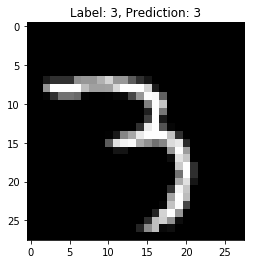

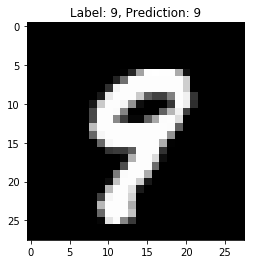

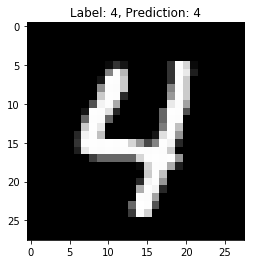

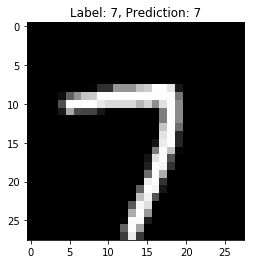

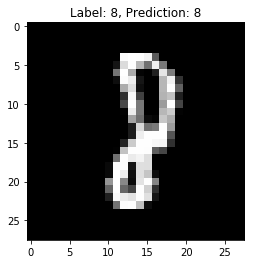

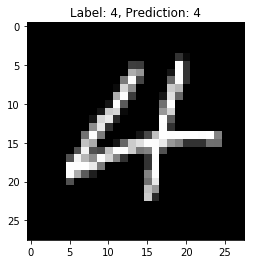

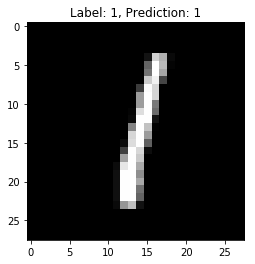

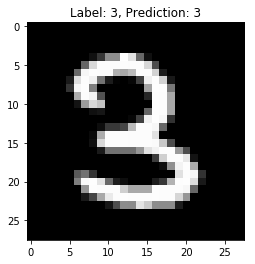

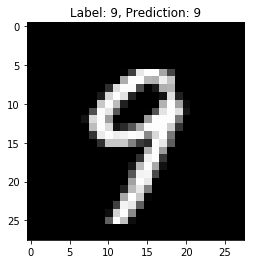

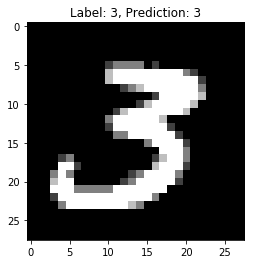

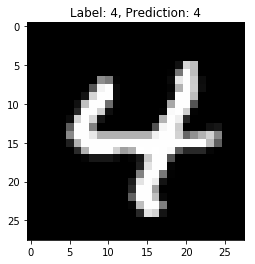

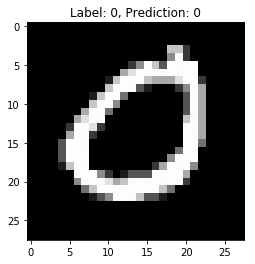

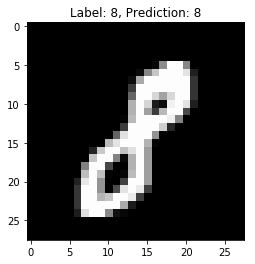

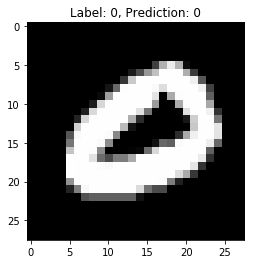

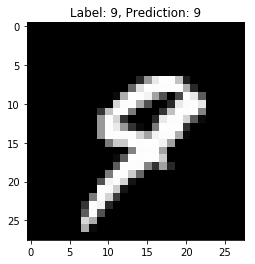

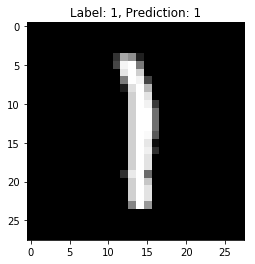

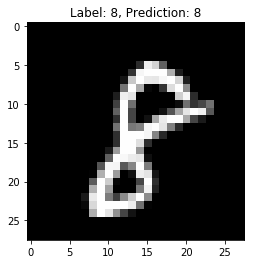

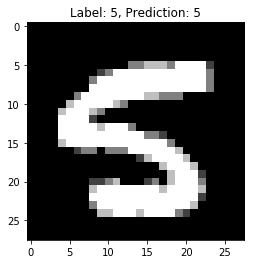

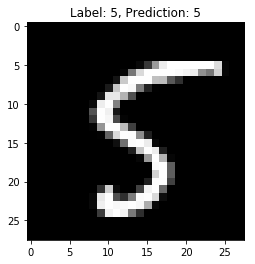

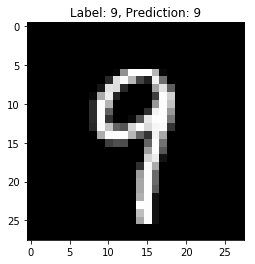

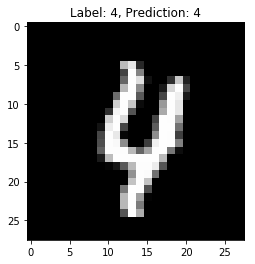

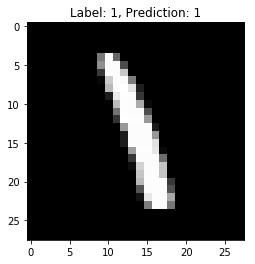

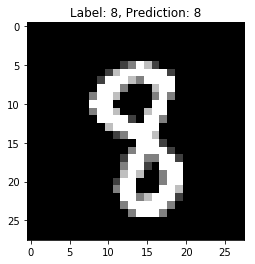

In [19]:
for prediction, datum, label in zip(predictions, eval_x, eval_y):
    visualize_prediction(datum, label, prediction)